<a href="https://colab.research.google.com/github/ANGEL201985/ANGEL201985/blob/main/Limite%20Liquido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,Numero de Golpes,Peso Capsula Suelo Humedo,Peso Capsula Suelo Seco,Peso Capsula,Peso Agua,Peso Suelo Seco,Contenido Humedad
1,15.00,32.27,29.29,18.67,2.98,10.62,28.06
2,22.00,34.55,31.25,18.92,3.30,12.33,26.76
3,29.00,30.52,27.43,15.51,3.09,11.92,25.92
4,36.00,34.34,30.37,14.64,3.97,15.73,25.24


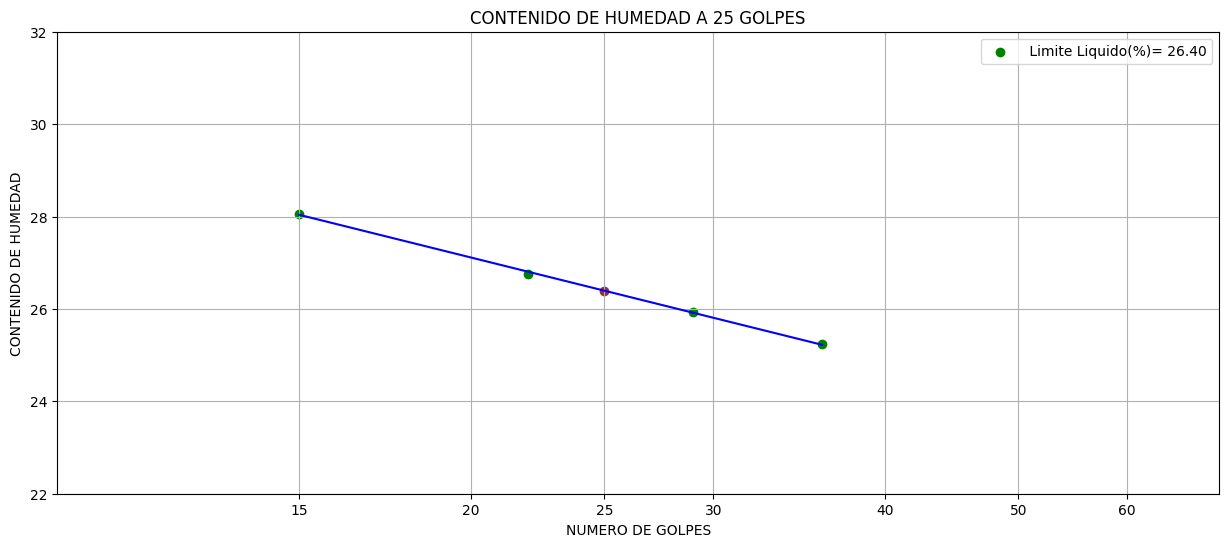

In [35]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from IPython.core.display import display
from IPython.display import HTML

peso_capsula_suelo_humedo = np.array([32.27, 34.55, 30.52, 34.34])
peso_capsula_suelo_seco = np.array([29.29, 31.25, 27.43, 30.37])
peso_capsula = np.array([18.67, 18.92, 15.51, 14.64])
numero_golpes = np.array([15, 22, 29, 36])
#Calculando el peso de agua
peso_agua = np.subtract(peso_capsula_suelo_humedo, peso_capsula_suelo_seco)
#Calculando el peso seco
peso_suelo_seco = np.subtract(peso_capsula_suelo_seco, peso_capsula)
#Calculando el contenido de humedad
contenido_humedad = np.divide(peso_agua, peso_suelo_seco)*100

#Crearemos nuestro DataFrame
df = pd.DataFrame({
    'Numero de Golpes':numero_golpes,
    'Peso Capsula Suelo Humedo': peso_capsula_suelo_humedo,
    'Peso Capsula Suelo Seco': peso_capsula_suelo_seco,
    'Peso Capsula'  : peso_capsula,
    'Peso Agua': peso_agua,
    'Peso Suelo Seco': peso_suelo_seco,
    'Contenido Humedad':contenido_humedad

}, index = [1,2,3,4])

tabla_estilos = (
    df.style
    .map(lambda val: 'background-color: lightgreen' if isinstance(val, (int, float)) else '')  # Aplica fondo verde a valores numéricos
    .format("{:.2f}")  # Formatea los valores numéricos con dos decimales
    .set_caption("Tabla de Resultados")  # Agrega un título
    .set_table_styles(
        [
            {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center')]},
            {'selector': 'th', 'props': [('background-color', '#f0f0f0'), ('color', 'black'), ('border', '1px solid gray'), ('text-align', 'center')]},
            {'selector': 'td', 'props': [('border', '1px solid gray'), ('padding', '5px'), ('text-align', 'center')]},
        ]
    )
)

# con HTML y el contenedor div centramos nuestro cuadro respecto al ancho.
display(HTML(f"""
<div style="display: flex; justify-content: center;">
    {tabla_estilos.to_html()}
</div>
"""))

# Calcularemos el numero de golpes en escala logarimtica
log_numero_golpes = np.log(df['Numero de Golpes'])

# Usaremos el modelo LinearRegression para crear nuestro modelo
modelo = LinearRegression()

#Definos mis variables en el eje x e y
x = log_numero_golpes.to_frame(name = "Numero de Golpes")
y = df['Contenido Humedad']

# Realizaremos nuestro ajuste de regresion linal usanfo la funcion fit
modelo.fit(x, y)

#Predecimos los valores con la funcion predict()
prediccion = modelo.predict(x)

#Calculo el el logaritmo para 25 golpes
log_25 = np.log(25)

#Caclular el Limite Liquido
Limite_Liquido = modelo.predict(pd.DataFrame([[log_25]], columns = ['Numero de Golpes']))[0]

#Graficar usando la biblioteca Matplotlib
plt.figure(figsize=(15,6))
ax = plt.gca()
#Graficamos los puntos de dispersion
plt.scatter(log_numero_golpes , df['Contenido Humedad'], color ='green')
plt.plot(log_numero_golpes, prediccion, color = 'blue' )
x_interseccion, y_interseccion = log_25, Limite_Liquido
plt.scatter(x_interseccion, y_interseccion, color = 'brown')

valores_golpes = [15, 20, 25, 30, 40, 50, 60]
valores_golpes_log = np.log(valores_golpes)
#Establecemos los limites en los ejes
plt.xlim(np.log(10), np.log(70))
plt.ylim(22,32)
#Con la funcion xtick ya establezco los marcadores en el eje x
plt.xticks(valores_golpes_log, valores_golpes)

plt.title('CONTENIDO DE HUMEDAD A 25 GOLPES')
plt.xlabel('NUMERO DE GOLPES')
plt.ylabel('CONTENIDO DE HUMEDAD')
plt.legend([f' Limite Liquido(%)= {Limite_Liquido:.2f}'])

plt.grid()

plt.show()






